In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('50_Startups.csv')

In [3]:
df.shape

(50, 5)

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [36]:
df['State'].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [39]:
# We convert state column into dummies
df_dummies = pd.get_dummies(df)

In [41]:
df_dummies

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [5]:
#Quick trial with statsmodels
import statsmodels.api as sm

C:\Users\Olabode\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [42]:
# create dependent (y) and indepenent variable X sets
X= df_dummies.drop(['Profit', 'State_New York'], axis=1)
y= df.iloc[:,4:5]

In [43]:
model=sm.OLS(y,X).fit()

In [44]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     735.7
Date:                Fri, 15 Feb 2019   Prob (F-statistic):           6.07e-42
Time:                        02:42:09   Log-Likelihood:                -544.86
No. Observations:                  50   AIC:                             1100.
Df Residuals:                      45   BIC:                             1109.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7308      0.066  

In [45]:
#backward elimination
X= df_dummies.drop(['Profit', 'State_New York','State_Florida'], axis=1)
y= df.iloc[:,4:5]

In [46]:
#model=sm.OLS(np.asarray(y),np.asarray(X)).fit()
model=sm.OLS(y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     927.0
Date:                Fri, 15 Feb 2019   Prob (F-statistic):           2.54e-43
Time:                        02:44:15   Log-Likelihood:                -545.20
No. Observations:                  50   AIC:                             1098.
Df Residuals:                      46   BIC:                             1106.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7235      0.065  

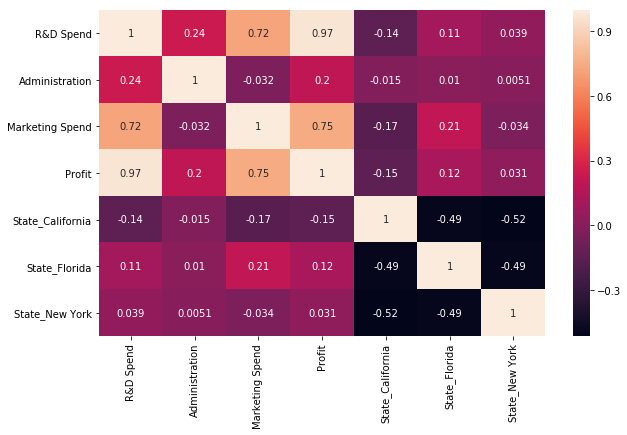

In [52]:
plt.figure(figsize= (10,6))
sns.heatmap(df_dummies.corr(), annot=True)

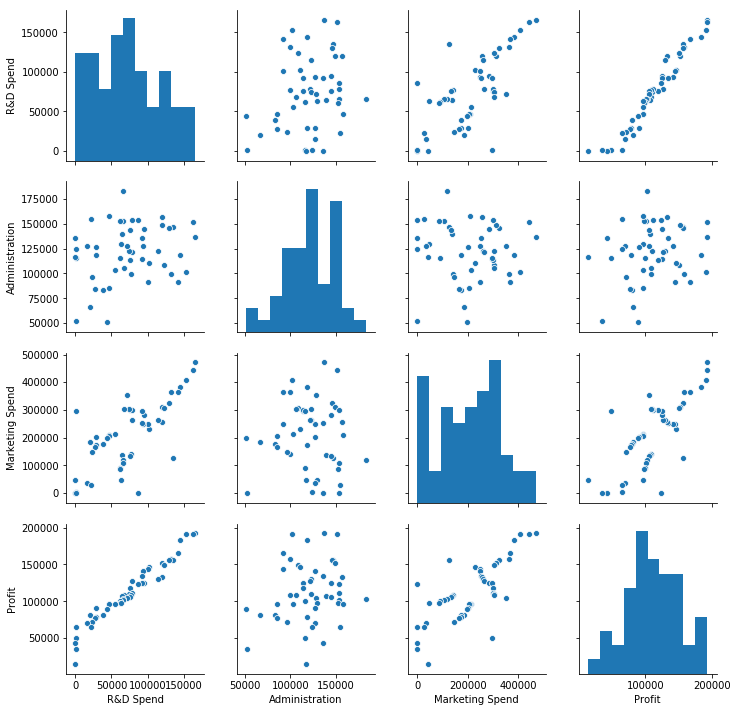

In [50]:
sns.pairplot(df)

In [54]:
#backward elimination
X= df.drop(['Profit', 'State'], axis=1)
y= df.iloc[:,4:5]

#model=sm.OLS(np.asarray(y),np.asarray(X)).fit()
model=sm.OLS(y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1232.
Date:                Fri, 15 Feb 2019   Prob (F-statistic):           1.17e-44
Time:                        02:49:13   Log-Likelihood:                -545.82
No. Observations:                  50   AIC:                             1098.
Df Residuals:                      47   BIC:                             1103.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.7180      0.065     